# Coding Assignment 1: Image Classification
- In this assignment you have to train image classification model with your own data


In [ ]:
!pip install -Uqq fastbook
!pip install -q jmd_imagescraper

from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *
from jmd_imagescraper.core import duckduckgo_search
import random
import shutil
import os

     |████████████████████████████████| 720 kB 10.7 MB/s 
     |████████████████████████████████| 189 kB 89.6 MB/s 
     |████████████████████████████████| 1.2 MB 96.3 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 241 kB/s 


## Problem 1: Collect Data (30 pts)
- You have to select 4 image categories of your own choice

In [ ]:
def configure_image_categories():
  '''
  input: None
  output: List of strings that contains 4 classes

  example: image_keywords = ['football', 'basketball', 'baseball', 'volleyball']
  '''
  # TODO: Complete the function
  image_keywords = ['football_match', 'basketball_match', 'baseball_match', 'volleyball_match']
  return image_keywords



## Image Crawling
- Following code will automatically crawl the code


In [ ]:
NUM_IMG = 50

image_types = configure_image_categories()
assert len(image_types)==4, "The length of image types has to be 4"
assert all( isinstance(typ, str) for typ in image_types), "Every element of image_types has to be string"

# Delete the previous images
!rm -rf images 
img_dir = Path('images')
train_dir = img_dir / 'train'
valid_dir = img_dir / 'valid'
for typ in image_types:
  duckduckgo_search(img_dir, typ, typ, max_results=NUM_IMG)
  typ_dir = img_dir / typ
  img_files = get_image_files(typ_dir)
  failed = verify_images(img_files)
  failed.map(Path.unlink)
  img_files 

Duckduckgo search: football_match


Duckduckgo search: basketball_match


Duckduckgo search: baseball_match


Duckduckgo search: volleyball_match


### Split train and valid by directory
- Do NOT change this cell
- After running it, it will automatically split train and valid to ratio of 8:2
  - Training data will be located `images/train`
  - Validation data will be locatd `images/valid`

In [ ]:
random.seed(0)
valid_indices = random.sample(range(NUM_IMG), NUM_IMG//5)

for typ in image_types:
  typ_dir = img_dir / typ
  if not typ_dir.exists():
    continue
  train_dir = img_dir / 'train' / typ
  valid_dir = img_dir / 'valid' / typ
  train_dir.mkdir(parents=True, exist_ok=True)
  valid_dir.mkdir(parents=True, exist_ok=True)
  img_files = get_image_files(typ_dir)
  valid_imgs = img_files[valid_indices]
  for fn in img_files[valid_indices]:
    shutil.move(fn, valid_dir/fn.name)
  img_files = get_image_files(typ_dir)
  for fn in img_files:
    shutil.move(fn, train_dir/fn.name)
  assert len(get_image_files(typ_dir)) == 0, f"There are still remaining files in {typ_dir}"
  os.rmdir(typ_dir)


## Problem 2: Report the first training result (10 pts)

# DataBlock
Class that can feed data in a right format to fastai model.
* *blocks*: type of input/labels. 
  * *(ImageBlock, CategoryBlock)* means that input is image and label is categorical value
* *get_items*: a function to load item from storage. 
  * *get_image_files* is a fastai function that get lists of image files in a given directory
* *splitter*: a function to split train and validation
  * *RandomSplitter* splits dataset in random.
* *get_y*: a function to get label 
  * *parent_label* means to use name of parent directory of item as the label
* *item_tfms*: item transformation. How to transform the loaded item before feeding it to a neural network model
  * *Resize* is to resize entire image into square of certain size. 

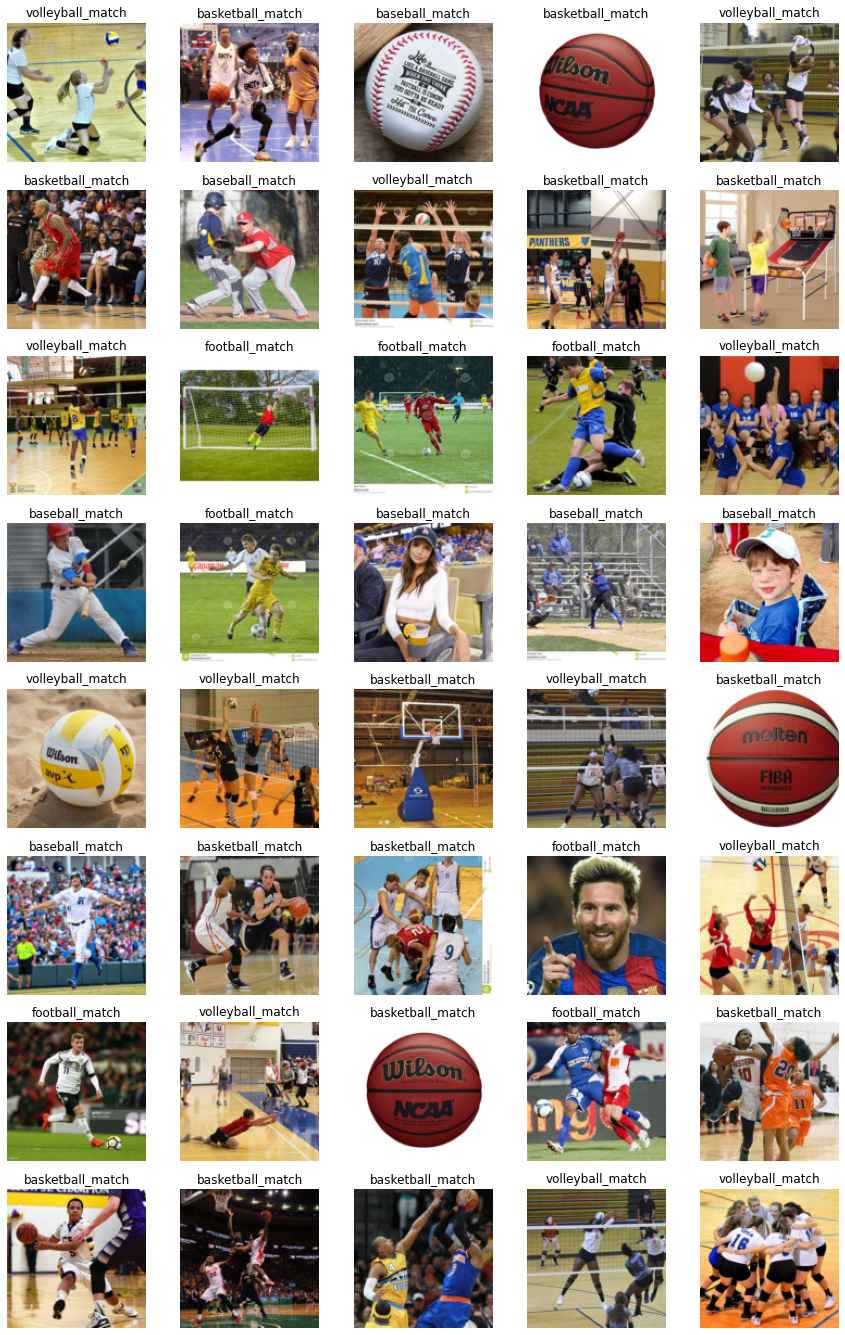

In [ ]:
images = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = images.dataloaders(img_dir)
dls.train.show_batch(max_n=40, ncols=5, unique=False)

In [ ]:
len(dls.valid)

1

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10) 

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.363526,3.108800,0.725000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,2.096182,2.308743,0.675000,00:10
1,1.895437,1.672153,0.600000,00:10
2,1.659064,1.189801,0.500000,00:10
3,1.421219,0.932265,0.375000,00:10
4,1.210949,0.781649,0.325000,00:10
5,1.039501,0.698949,0.300000,00:10
6,0.899523,0.646019,0.325000,00:10
7,0.789887,0.609316,0.275000,00:10
8,0.709408,0.600771,0.225000,00:10
9,0.637972,0.600553,0.225000,00:10


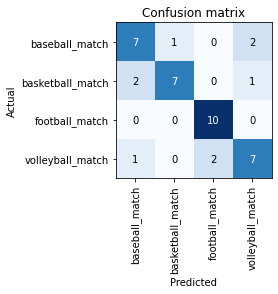

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
dir(interp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__stored_args__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'confusion_matrix',
 'decoded',
 'dl',
 'from_learner',
 'inputs',
 'losses',
 'most_confused',
 'plot_confusion_matrix',
 'plot_top_losses',
 'preds',
 'print_classification_report',
 'targs',
 'top_losses',
 'vocab']

In [ ]:
??interp.plot_top_losses(5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


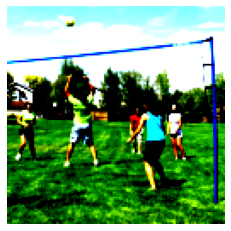

In [ ]:
interp.inputs[0][12].show()

In [ ]:
from jmd_imagescraper.imagecleaner import display_image_cleaner

display_image_cleaner('images')

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…